# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr


# Import API key
from Keyring import Weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
Output = "/DNI/Output/cities.csv"

# Range of latitudes and longitudes
LatRange = (-90, 90)
LongRange = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
Coord = []
Cities = []

# Create a set of random lat and lng combinations
Lat = np.random.uniform(LatRange[0], LatRange[1], size=1500)
Long = np.random.uniform(LongRange[0], LongRange[1], size=1500)
Coord = zip(Lat, Long)

# Identify nearest city for each lat, lng combination
for pin in Coord:
    city = citipy.nearest_city(pin[0], pin[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in Cities:
        Cities.append(city)

# Print the city count to confirm sufficient count
len(Cities)



601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# FewCit = ['barrow', 'jamestown', 'manaure', 'tual', 'sambava']

BaseURL = "http://api.openweathermap.org/data/2.5/weather?"

Temp = []
HMD = []
Cloud = []
Wind = []
Cit = []
Lat = []
Lon = []
Counter = 1



# Build query URL
for City in Cities:
        try:
            print("Beginning data retreval for record " + str(Counter) + ", "+ City.title() + ".")
            QueryURL = BaseURL + "appid=" + Weather + "&q=" + City + "&units=imperial"
            Data = requests.get(QueryURL).json()
            Temp.append(Data['main']['temp_max'])
            HMD.append(Data['main']['humidity'])
            Cloud.append(Data['clouds']['all'])
            Wind.append(Data['wind']['speed'])
            Cit.append(City.title())
            Lat.append(Data['coord']['lat'])
            Lon.append(Data['coord']['lon'])
            print(City.title() + " has been processed.")
            Counter = Counter + 1
            
        except KeyError:
            print("There was an issue retreiving data for " + City.title())


Beginning data retreval for record 1, Rikitea.
Rikitea has been processed.
Beginning data retreval for record 2, College.
College has been processed.
Beginning data retreval for record 3, Khatanga.
Khatanga has been processed.
Beginning data retreval for record 4, Boyolangu.
Boyolangu has been processed.
Beginning data retreval for record 5, Tuktoyaktuk.
Tuktoyaktuk has been processed.
Beginning data retreval for record 6, Itarema.
Itarema has been processed.
Beginning data retreval for record 7, Bredasdorp.
Bredasdorp has been processed.
Beginning data retreval for record 8, Vaitupu.
There was an issue retreiving data for Vaitupu
Beginning data retreval for record 8, Escarcega.
Escarcega has been processed.
Beginning data retreval for record 9, Zyukayka.
Zyukayka has been processed.
Beginning data retreval for record 10, Illoqqortoormiut.
There was an issue retreiving data for Illoqqortoormiut
Beginning data retreval for record 10, Nanakuli.
Nanakuli has been processed.
Beginning data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
DataDict = {"City": Cit, "Lat": Lat, "Lon": Lon, "Temp": Temp, "HUM": HMD, "Cloud": Cloud, "Wind": Wind}
WeatherTable = pd.DataFrame(DataDict)
WeatherTable.to_csv("Output/CityData.csv")

WeatherTable

,City,Lat,Lon,Temp,HUM,Cloud,Wind
0,Rikitea,-23.1203,-134.9692,78.80,77,88,20.67
1,College,64.8569,-147.8028,36.00,55,75,13.80
2,Khatanga,71.9667,102.5000,30.90,92,100,7.94
3,Boyolangu,-8.1181,111.8935,73.85,91,72,1.54
4,Tuktoyaktuk,69.4541,-133.0374,21.20,79,20,10.36
...,...,...,...,...,...,...,...
552,Hondo,32.4500,130.2000,68.00,73,75,27.63
553,Muyezerskiy,63.9333,31.6500,25.66,81,31,3.91
554,Belaya Gora,68.5333,146.4167,23.88,88,100,10.60
555,Necochea,-38.5473,-58.7368,60.01,70,0,7.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
TooWet = WeatherTable.loc[WeatherTable['HUM'] > 100]
TooWet

,City,Lat,Lon,Temp,HUM,Cloud,Wind


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

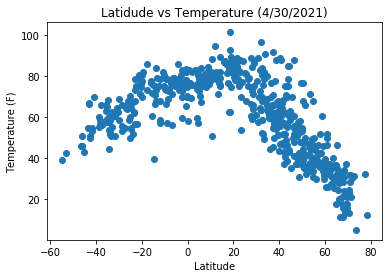

In [8]:
y_values = WeatherTable["Temp"]
x_values = WeatherTable["Lat"]
plt.scatter(x_values,y_values)

plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.title("Latidude vs Temperature (4/30/2021)")
plt.show()

## Latitude vs. Humidity Plot

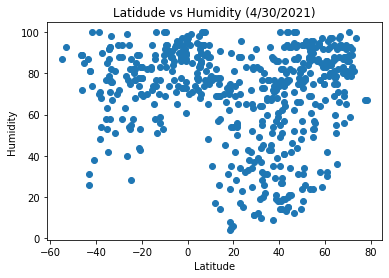

In [9]:
y_values = WeatherTable["HUM"]
x_values = WeatherTable["Lat"]
plt.scatter(x_values,y_values)

plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Latidude vs Humidity (4/30/2021)")
plt.show()

## Latitude vs. Cloudiness Plot

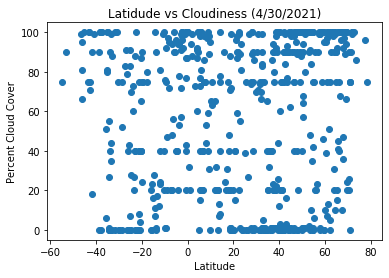

In [10]:
y_values = WeatherTable["Cloud"]
x_values = WeatherTable["Lat"]
plt.scatter(x_values,y_values)

plt.ylabel('Percent Cloud Cover')
plt.xlabel('Latitude')
plt.title("Latidude vs Cloudiness (4/30/2021)")
plt.show()

## Latitude vs. Wind Speed Plot

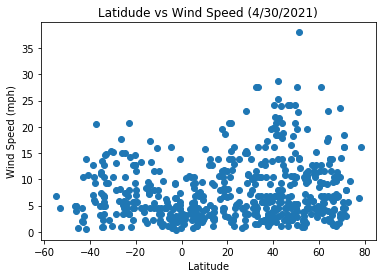

In [11]:
y_values = WeatherTable["Wind"]
x_values = WeatherTable["Lat"]
plt.scatter(x_values,y_values)

plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title("Latidude vs Wind Speed (4/30/2021)")
plt.show()

## Linear Regression

In [12]:
# Limit data to Northern hemisphere
TopHalf = WeatherTable.loc[WeatherTable['Lat'] >= 0]

# Limit data to Southern hemisphere
BottomHalf = WeatherTable.loc[WeatherTable['Lat'] < 0]

print("Of " + str(len(WeatherTable)) + " cities " + str(len(TopHalf)) + " are in the northern hemisphere while the remaining " + str(len(BottomHalf)) + " are in the southern hemisphere.")

Of 557 cities 393 are in the northern hemisphere while the remaining 164 are in the southern hemisphere.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between temperature and latitude in the northern hemisphere is -0.84
The r-squared is: 0.71


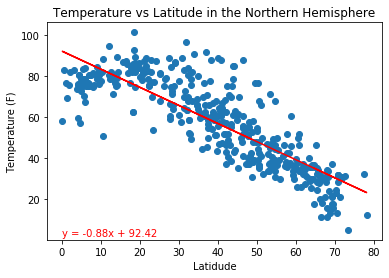

In [13]:
correlation = st.pearsonr(TopHalf["Lat"],TopHalf["Temp"])
print(f"The correlation between temperature and latitude in the northern hemisphere is {round(correlation[0],2)}")

x_values = TopHalf["Lat"]
y_values = TopHalf["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Temperature (F)')
plt.title ("Temperature vs Latitude in the Northern Hemisphere")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,2),fontsize=10,color="red")

plt.savefig("Output/NorthHemTempVsLat.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between temperature and latitude in the southern hemisphere is 0.73
The r-squared is: 0.53


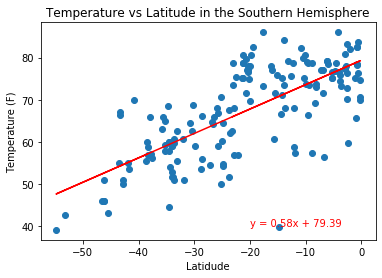

In [14]:
correlation = st.pearsonr(BottomHalf["Lat"],BottomHalf["Temp"])
print(f"The correlation between temperature and latitude in the southern hemisphere is {round(correlation[0],2)}")

x_values = BottomHalf["Lat"]
y_values = BottomHalf["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Temperature (F)')
plt.title ("Temperature vs Latitude in the Southern Hemisphere")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(-20,40),fontsize=10,color="red")

plt.savefig("Output/SouthHemTempVsLat.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity and latitude in the northern hemisphere is 0.12
The r-squared is: 0.01


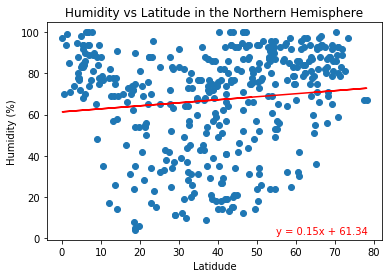

In [15]:
correlation = st.pearsonr(TopHalf["Lat"],TopHalf["HUM"])
print(f"The correlation between humidity and latitude in the northern hemisphere is {round(correlation[0],2)}")

x_values = TopHalf["Lat"]
y_values = TopHalf["HUM"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Humidity (%)')
plt.title ("Humidity vs Latitude in the Northern Hemisphere")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(55,2),fontsize=10,color="red")

plt.savefig("Output/NorthHemHumidVsLat.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity and latitude in the southern hemisphere is 0.26
The r-squared is: 0.07


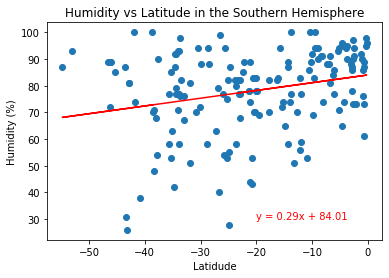

In [16]:
correlation = st.pearsonr(BottomHalf["Lat"],BottomHalf["HUM"])
print(f"The correlation between humidity and latitude in the southern hemisphere is {round(correlation[0],2)}")

x_values = BottomHalf["Lat"]
y_values = BottomHalf["HUM"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Humidity (%)')
plt.title ("Humidity vs Latitude in the Southern Hemisphere")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(-20,30),fontsize=10,color="red")

plt.savefig("Output/SouthHemHumidVsLat.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloud cover and latitude in the northern hemisphere is 0.11
The r-squared is: 0.01


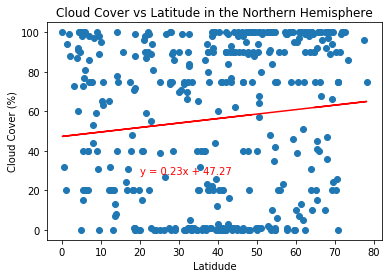

In [17]:
correlation = st.pearsonr(TopHalf["Lat"],TopHalf["Cloud"])
print(f"The correlation between cloud cover and latitude in the northern hemisphere is {round(correlation[0],2)}")

x_values = TopHalf["Lat"]
y_values = TopHalf["Cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Cloud Cover (%)')
plt.title ("Cloud Cover vs Latitude in the Northern Hemisphere")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(20,28),fontsize=10,color="red")

plt.savefig("Output/NorthHemCloudVsLat.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloud cover and latitude in the southern hemisphere is 0.05
The r-squared is: 0.0


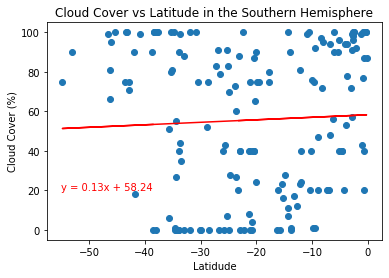

In [18]:
correlation = st.pearsonr(BottomHalf["Lat"],BottomHalf["Cloud"])
print(f"The correlation between cloud cover and latitude in the southern hemisphere is {round(correlation[0],2)}")

x_values = BottomHalf["Lat"]
y_values = BottomHalf["Cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Cloud Cover (%)')
plt.title ("Cloud Cover vs Latitude in the Southern Hemisphere")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(-55,20),fontsize=10,color="red")

plt.savefig("Output/SouthHemCloudVsLat.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between wind speed and latitude in the northern hemisphere is 0.13
The r-squared is: 0.02


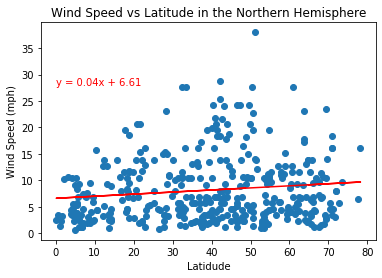

In [19]:
correlation = st.pearsonr(TopHalf["Lat"],TopHalf["Wind"])
print(f"The correlation between wind speed and latitude in the northern hemisphere is {round(correlation[0],2)}")

x_values = TopHalf["Lat"]
y_values = TopHalf["Wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Wind Speed (mph)')
plt.title ("Wind Speed vs Latitude in the Northern Hemisphere")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,28),fontsize=10,color="red")

plt.savefig("Output/NorthHemWindidVsLat.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between cloud cover and latitude in the southern hemisphere is -0.19
The r-squared is: 0.03


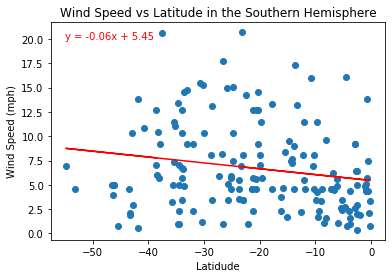

In [20]:
correlation = st.pearsonr(BottomHalf["Lat"],BottomHalf["Wind"])
print(f"The correlation between cloud cover and latitude in the southern hemisphere is {round(correlation[0],2)}")

x_values = BottomHalf["Lat"]
y_values = BottomHalf["Wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Wind Speed (mph)')
plt.title ("Wind Speed vs Latitude in the Southern Hemisphere")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(-55,20),fontsize=10,color="red")

plt.savefig("Output/SouthHemWindVsLat.png")

plt.show()